In [1]:
import tensorflow as tf

train_dir = "dataset/Training"
test_dir = "dataset/Testing"

IMG_SIZE = (150, 150)
BATCH_SIZE = 32


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [3]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [4]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),       # 🔄 NEW: Add Input layer first
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Multi-class output
])


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 90s 418ms/step - accuracy: 0.5935 - loss: 0.9363 - val_accuracy: 0.7346 - val_loss: 0.6220
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 325ms/step - accuracy: 0.8467 - loss: 0.4133 - val_accuracy: 0.8436 - val_loss: 0.4434
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 326ms/step - accuracy: 0.9066 - loss: 0.2673 - val_accuracy: 0.8993 - val_loss: 0.2676
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 59s 328ms/step - accuracy: 0.9325 - loss: 0.1942 - val_accuracy: 0.9130 - val_loss: 0.2161
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 58s 325ms/step - accuracy: 0.9413 - loss: 0.1625 - val_accuracy: 0.8894 - val_loss: 0.2734
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 59s 329ms/step - accuracy: 0.9506 - loss: 0.1390 - val_accuracy: 0.9443 - val_loss: 0.1664
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 320ms/step - accuracy: 0.9609 - loss: 0.1159 - val_accuracy: 0.9634 - val_loss: 0.1395
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 319ms/step - accuracy: 0.9768 - loss: 0

In [9]:
model.save("model/brain_tumor_classifier.h5")


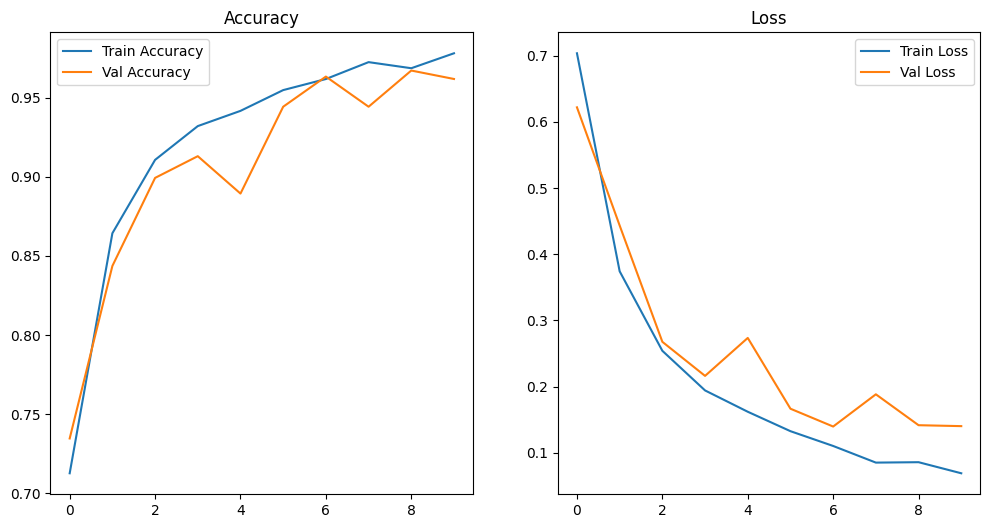

In [11]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Load trained model
model = load_model("model/brain_tumor_classifier.h5")

# Define class names (in the same order as training folders)
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load and preprocess image
img_path = "D:/tensorflow/brain_tumor_project/dataset/Testing/pituitary/Te-pi_0010.jpg"  
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 150, 150, 3)

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

print(f"Predicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted Tumor Type: pituitary
